## Load and Configure Dataset

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(7,7)}, font_scale=1.2)
df = pd.DataFrame()
df = pd.read_csv('balanced_dataset.csv')
df.groupby('outcome').size()

outcome
died         6010
recovered    6010
dtype: int64

In [2]:
df = df.replace('recovered',1)
df = df.replace('severe',0)
df = df.replace('died',0)
df = df.replace('stable',1)
df['chronic_disease'].fillna(0, inplace=True)

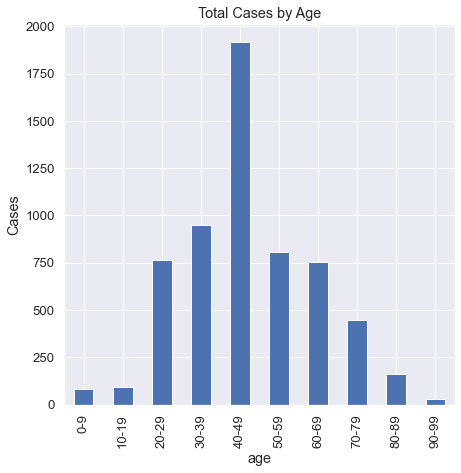

In [3]:
df.groupby('age')['outcome'].sum()

labels = ["0-9", "10-19", "20-29", "30-39", "40-49","50-59","60-69","70-79",
         "80-89", "90-99"]

groups = pd.cut(x = df['age'], bins=[0,9,19,29,39,49,59,69,79,89,99], labels=labels)

df.groupby(groups)['outcome'].sum().plot(kind='bar')
plt.title('Total Cases by Age')
plt.ylabel('Cases')

plt.show()

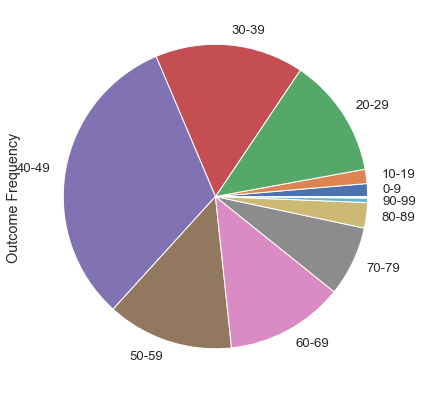

In [4]:
groups_survived = df.groupby(groups)['outcome'].sum()
groups_size = df.groupby(groups).size()
list_ = groups_survived / 6010
list_.plot(kind='pie', normalize=False, ylabel='Outcome Frequency')

plt.show()

In [5]:
df.head()

,age,sex,city,province,country,lives_in_Wuhan,travel_history_location,additional_information,chronic_disease_binary,chronic_disease,...,shortness of breath,somnolence,sore throat,sputum,septic shock,Heart attack,cold,cardiac disease,hypoxia,outcome
0,65.0,0,Seattle,Washington,United States,NaN,NaN,family member of a confirmed case of COVID-19,0,0,...,0,0,0,0,0,0,0,0,0,1
1,54.0,0,Taguig,Metro Manila,Philippines,NaN,NaN,C871964,0,0,...,0,0,0,0,0,0,0,0,0,1
2,40.0,0,Pasay,Metro Manila,Philippines,NaN,NaN,C430124,0,0,...,0,0,0,0,0,0,0,0,0,1
3,28.0,0,Muntinlupa,Metro Manila,Philippines,NaN,NaN,C741550,0,0,...,0,0,0,0,0,0,0,0,0,1
4,30.0,0,Cainta,Rizal,Philippines,NaN,NaN,C535553,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
df.columns

Index(['age', 'sex', 'city', 'province', 'country', 'lives_in_Wuhan',
       'travel_history_location', 'additional_information',
       'chronic_disease_binary', 'chronic_disease',
       'chronic_disease_Hypertension', 'chronic_disease_Diabetes',
       'chronic_disease_kidney', 'chronic_disease_COPD',
       'chronic_disease_heart', 'chronic_disease_asthma',
       'chronic_disease_cardiac', 'chronic_disease_prostate',
       'chronic_disease_cancer', 'chronic_disease_TB',
       'chronic_disease_Hepatitis', 'chronic_disease_HIV',
       'chronic_disease_cereberal', 'chronic_disease_Parkinson',
       'chronic_disease_bronchitis', 'chronic_disease_hypothyroidism',
       'chronic_disease_dyslipidemia', 'anorexia', 'chest pain', 'chills',
       'conjunctivitis', 'cough', 'diarrhea', 'dizziness', 'dyspnea', 'emesis',
       'expectoration', 'eye irritation', 'fatigue', 'fever', 'gasp',
       'headache', 'kidney failure', 'lesions on chest radiographs',
       'hypertension', 'Myalgi

In [7]:
# creaete list of attributes
num_feat=['age', 'sex', 'anorexia', 'chronic_disease_binary','chronic_disease_Hypertension', 
       'chronic_disease_Diabetes','chronic_disease_kidney', 'chronic_disease_COPD',
       'chronic_disease_heart', 'chronic_disease_asthma','chronic_disease_cardiac', 
       'chronic_disease_prostate','chronic_disease_cancer', 'chronic_disease_TB',
       'chronic_disease_Hepatitis', 'chronic_disease_HIV','chronic_disease_cereberal', 
       'chronic_disease_Parkinson','chronic_disease_bronchitis', 'chronic_disease_hypothyroidism',
       'chronic_disease_dyslipidemia', 'anorexia', 'chest pain',
       'chills', 'conjunctivitis', 'cough', 'diarrhea', 'dizziness', 'dyspnea',
       'emesis', 'expectoration', 'eye irritation', 'fatigue', 'fever', 'gasp',
       'headache', 'kidney failure', 'lesions on chest radiographs',
       'hypertension', 'Myalgia', 'obnubilation', 'pneumonia', 'myelofibrosis',
       'respiratory distress', 'rhinorrhea', 'shortness of breath',
       'somnolence', 'sore throat', 'sputum', 'septic shock', 'Heart attack',
       'cold', 'cardiac disease', 'hypoxia']

# correlation
df.corr()

,age,sex,chronic_disease_binary,chronic_disease_Hypertension,chronic_disease_Diabetes,chronic_disease_kidney,chronic_disease_COPD,chronic_disease_heart,chronic_disease_asthma,chronic_disease_cardiac,...,shortness of breath,somnolence,sore throat,sputum,septic shock,Heart attack,cold,cardiac disease,hypoxia,outcome
age,1.000000,0.049554,0.193957,0.167183,0.116855,0.080140,0.071872,0.061443,0.018021,0.046747,...,-0.002883,-0.001289,-0.004235,-0.002233,-0.005624,-0.002812,-0.002233,-0.001823,-0.001823,1.264008e-01
sex,0.049554,1.000000,0.031708,0.018917,0.024827,0.012495,0.001556,0.014353,0.000452,0.012216,...,0.001556,0.008050,-0.016303,-0.007287,-0.007095,-0.001571,0.003329,-0.001616,-0.001616,1.141967e-01
chronic_disease_binary,0.193957,0.031708,1.000000,0.800582,0.595078,0.371812,0.195856,0.231760,0.231760,0.214559,...,-0.002125,-0.000950,-0.003682,-0.001646,-0.004144,-0.003427,-0.001646,-0.001344,-0.001344,8.962289e-02
chronic_disease_Hypertension,0.167183,0.018917,0.800582,1.000000,0.515510,0.360504,-0.001701,0.206203,0.122916,0.178048,...,-0.001701,-0.000761,-0.002948,-0.001318,-0.003318,-0.002744,-0.001318,-0.001076,-0.001076,7.735779e-02
chronic_disease_Diabetes,0.116855,0.024827,0.595078,0.515510,1.000000,0.171826,0.064814,0.221908,0.110206,0.179585,...,-0.001264,-0.000565,-0.002191,-0.000979,-0.002466,-0.002039,-0.000979,-0.000800,-0.000800,5.928627e-02
chronic_disease_kidney,0.080140,0.012495,0.371812,0.360504,0.171826,1.000000,-0.000790,0.088245,-0.000935,-0.000865,...,-0.000790,-0.000353,-0.001369,-0.000612,-0.001541,-0.001274,-0.000612,-0.000500,-0.000500,3.442365e-02
chronic_disease_COPD,0.071872,0.001556,0.195856,-0.001701,0.064814,-0.000790,1.000000,-0.000492,-0.000492,-0.000456,...,-0.000416,-0.000186,-0.000721,-0.000322,-0.000812,-0.000671,-0.000322,-0.000263,-0.000263,2.039967e-02
chronic_disease_heart,0.061443,0.014353,0.231760,0.206203,0.221908,0.088245,-0.000492,1.000000,-0.000583,-0.000539,...,-0.000492,-0.000220,-0.000853,-0.000381,-0.000960,-0.000794,-0.000381,-0.000311,-0.000311,2.413922e-02
chronic_disease_asthma,0.018021,0.000452,0.231760,0.122916,0.110206,-0.000935,-0.000492,-0.000583,1.000000,-0.000539,...,-0.000492,-0.000220,-0.000853,-0.000381,-0.000960,-0.000794,-0.000381,-0.000311,-0.000311,1.724230e-02
chronic_disease_cardiac,0.046747,0.012216,0.214559,0.178048,0.179585,-0.000865,-0.000456,-0.000539,-0.000539,1.000000,...,-0.000456,-0.000204,-0.000790,-0.000353,-0.000889,-0.000735,-0.000353,-0.000288,-0.000288,2.234765e-02


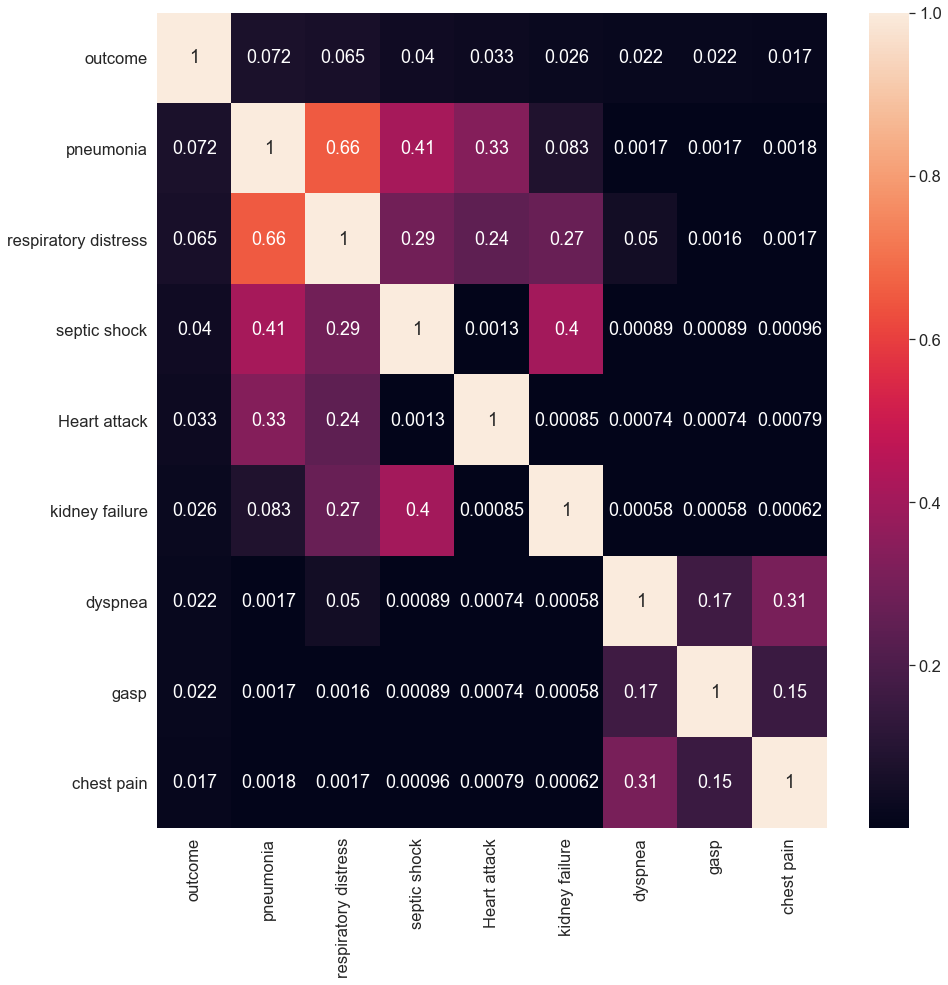

In [8]:
# Sort Correlation Matrix
#corr_mat = df.corr(method='pearson')
                   
#upper_corr_mat = corr_mat.where(
#    np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
  
# Convert to 1-D series and drop Null values
#unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
#sorted_mat = unique_corr_pairs.sort_values()
#print(sorted_mat[0:50])

#outcome                         pneumonia                      -0.071579
#                                respiratory distress           -0.065037
#                                septic shock                   -0.039789
#                                Heart attack                   -0.032904
#                                kidney failure                 -0.025807
#                                dyspnea                        -0.022348
#                                gasp                           -0.022348
#                                chest pain                     -0.017242

data = df[['outcome', 'pneumonia', 'respiratory distress', 'septic shock', 'Heart attack', 'kidney failure', 'dyspnea', 'gasp', 'chest pain']]
sns.set(rc={'figure.figsize':(15,15)}, font_scale=1.5)
sns.heatmap(data.corr().abs(), annot=True)
plt.show()

In [9]:
numX= df[num_feat]

# Check for null columns
null_columns = numX.columns[numX.isnull().any()]
numX[null_columns].isnull().sum().count()

0

In [10]:
#checking X matrix
df_attributes = df[num_feat]
df_attributes.head()

,age,sex,anorexia,chronic_disease_binary,chronic_disease_Hypertension,chronic_disease_Diabetes,chronic_disease_kidney,chronic_disease_COPD,chronic_disease_heart,chronic_disease_asthma,...,rhinorrhea,shortness of breath,somnolence,sore throat,sputum,septic shock,Heart attack,cold,cardiac disease,hypoxia
0,65.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,54.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,40.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_target = df['outcome']

## Split and Shuffle Dataset

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_attributes, df_target, test_size=0.25, random_state=2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9015, 54)
(9015,)
(3005, 54)
(3005,)


## Model Training and Accuracy Tests

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# instance of Decision Tree 
decision_tree = DecisionTreeClassifier()
# train Decision Tree model 
decision_tree.fit(X_train, y_train)
# predicting using test data
predict_decision_tree = decision_tree.predict(X_test)

# calculate accuracy score
acc_dt = accuracy_score(y_test, predict_decision_tree)
print('Accuracy of Decision Tree model: ', acc_dt)

Accuracy of Decision Tree model:  0.8632279534109817


In [14]:
from sklearn.neighbors import KNeighborsClassifier

# instance of KNN
KNN = KNeighborsClassifier(n_neighbors=5)
# train KNN model
KNN.fit(X_train, y_train)
# predicting using test data
predict_KNN = KNN.predict(X_test)

# calculate accuracy score
acc_KNN = accuracy_score(y_test, predict_KNN)
print('Accuracy of KNN model: ', acc_KNN)

Accuracy of KNN model:  0.8655574043261232


In [15]:
from sklearn.linear_model import LogisticRegression

# instance of Logistig Regression
log_reg = LogisticRegression(max_iter=3000)
# train Logistic Regression model
log_reg.fit(X_train, y_train)
# predicting using test data
predict_log_reg = log_reg.predict(X_test)

# calculate accuracy score
acc_log_reg = accuracy_score(y_test, predict_log_reg)
print('Accuracy of Logistic Regression model: ', acc_log_reg)

Accuracy of Logistic Regression model:  0.5424292845257903


In [16]:
from sklearn.ensemble import RandomForestClassifier

# instance of Random Forest Classifier
RFC = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)
# train RFC model
RFC.fit(X_train, y_train)
# predicting using test data
predict_RFC = RFC.predict(X_test)

# calculate accuracy score
acc_RFC = accuracy_score(y_test, predict_RFC)
print('Accuracy of RFC model: ', acc_RFC)

Accuracy of RFC model:  0.8642262895174709


## Confusion Matrices 

Text(0.5, 1.0, 'Random Forest')

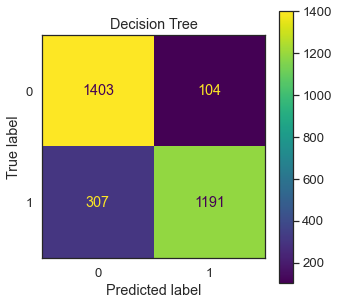

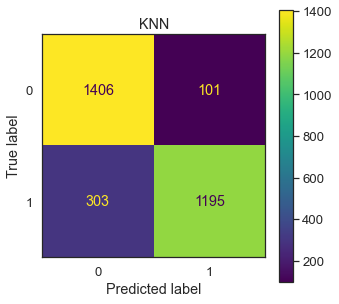

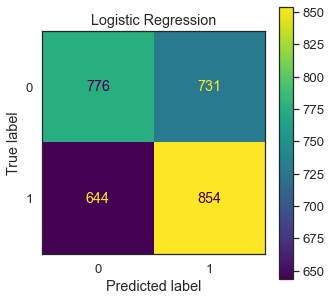

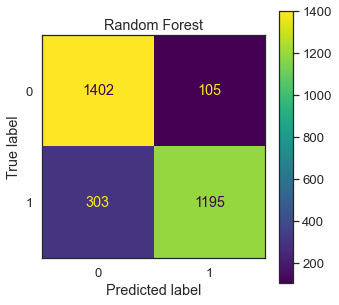

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

sns.set(rc={'figure.figsize':(5,5)}, font_scale=1.2)
sns.set_style('white')

matrix_dc = confusion_matrix(y_test, predict_decision_tree, labels=[0,1])
matrix_knn = confusion_matrix(y_test, predict_KNN, labels=[0,1])
matrix_lr = confusion_matrix(y_test, predict_log_reg, labels=[0,1])
matrix_rf = confusion_matrix(y_test, predict_RFC, labels=[0,1])

matrix_dc_ = ConfusionMatrixDisplay(matrix_dc).plot()
matrix_dc_.ax_.set_title('Decision Tree')
matrix_knn_ = ConfusionMatrixDisplay(matrix_knn).plot()
matrix_knn_.ax_.set_title('KNN')
matrix_lr_ = ConfusionMatrixDisplay(matrix_lr).plot()
matrix_lr_.ax_.set_title('Logistic Regression')
matrix_rf_ = ConfusionMatrixDisplay(matrix_rf).plot()
matrix_rf_.ax_.set_title('Random Forest')

## Model Reports - Precision, Recall

In [18]:
from sklearn.metrics import classification_report
print("Decision Tree Report\n", classification_report(y_test, predict_decision_tree, labels=[0,1]))
print("-------------------------------------------------------------------------")
print("KNN Report\n", classification_report(y_test, predict_KNN, labels=[0,1]))
print("-------------------------------------------------------------------------")
print("Logistic Reg Report\n", classification_report(y_test, predict_log_reg, labels=[0,1]))
print("-------------------------------------------------------------------------")
print("Random Forest Report\n", classification_report(y_test, predict_RFC, labels=[0,1]))

Decision Tree Report
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      1507
           1       0.92      0.80      0.85      1498

    accuracy                           0.86      3005
   macro avg       0.87      0.86      0.86      3005
weighted avg       0.87      0.86      0.86      3005

-------------------------------------------------------------------------
KNN Report
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      1507
           1       0.92      0.80      0.86      1498

    accuracy                           0.87      3005
   macro avg       0.87      0.87      0.86      3005
weighted avg       0.87      0.87      0.86      3005

-------------------------------------------------------------------------
Logistic Reg Report
               precision    recall  f1-score   support

           0       0.55      0.51      0.53      1507
           1       0.54      0.57 

## Cross Validation and ROC Table

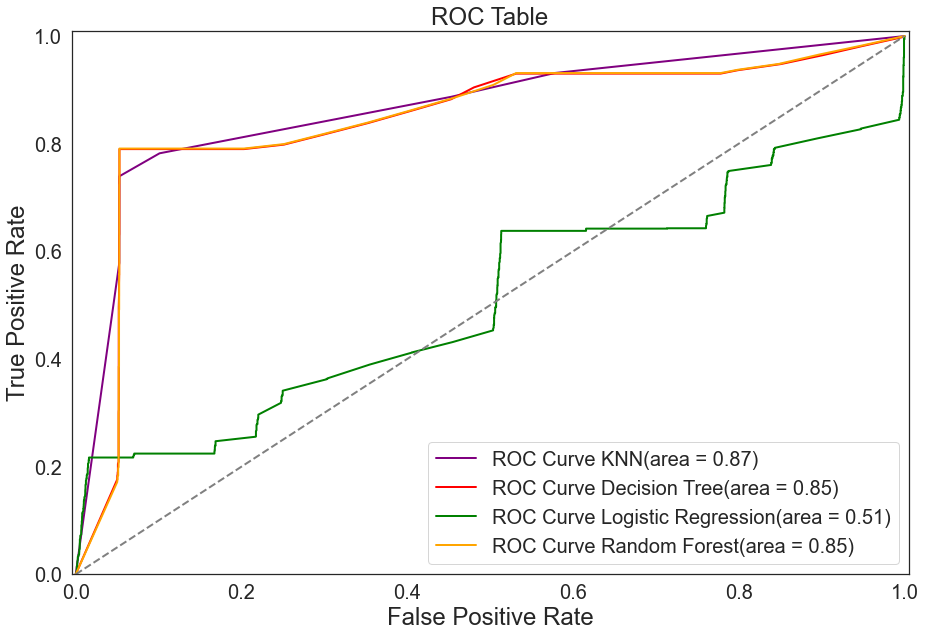

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

X = df[num_feat]
y = df['outcome']

dt_proba = cross_val_predict(decision_tree, X, y, cv=10, method='predict_proba')[:,1]
knn_proba = cross_val_predict(KNN, X, y, cv=10, method='predict_proba')[:,1]
lr_proba = cross_val_predict(log_reg, X, y, cv=10, method='predict_proba')[:,1]
rf_proba = cross_val_predict(RFC, X, y, cv=10, method='predict_proba')[:,1]

fpr_dt, tpr_dt, _ = metrics.roc_curve(y, dt_proba, pos_label=1)
fpr_knn, tpr_knn, _ = metrics.roc_curve(y, knn_proba, pos_label=1)
fpr_lr, tpr_lr, _ = metrics.roc_curve(y, lr_proba, pos_label=1)
fpr_rf, tpr_rf, _ = metrics.roc_curve(y, rf_proba, pos_label=1)

AUC_dt = metrics.auc(fpr_dt, tpr_dt)
AUC_knn = metrics.auc(fpr_knn, tpr_knn)
AUC_lr = metrics.auc(fpr_lr, tpr_lr)
AUC_rf = metrics.auc(fpr_rf, tpr_rf)

rc={'axes.labelsize': 24, 'font.size': 24, 'legend.fontsize': 24, 'axes.titlesize': 24}
plt.rcParams.update(**rc)

fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(direction='out', length=6, width=2, labelsize=20,
               grid_color='r', grid_alpha=0.5)

plt.plot(fpr_knn, tpr_knn, color='purple', lw=2, label='ROC Curve KNN(area = %0.2f)' % AUC_knn)
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label='ROC Curve Decision Tree(area = %0.2f)' % AUC_dt)
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label='ROC Curve Logistic Regression(area = %0.2f)' % AUC_lr)
plt.plot(fpr_rf, tpr_rf, color='orange', lw=2, label='ROC Curve Random Forest(area = %0.2f)' % AUC_rf)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')

plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

plt.legend(loc=4, prop={'size': 20,'weight':'normal','style':'normal'})
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Table')

plt.show()